### Домашняя работа к Уроку 1. Основы обучения нейронных сетей
### Студент: Абрамов А.В.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

(1797, 64)


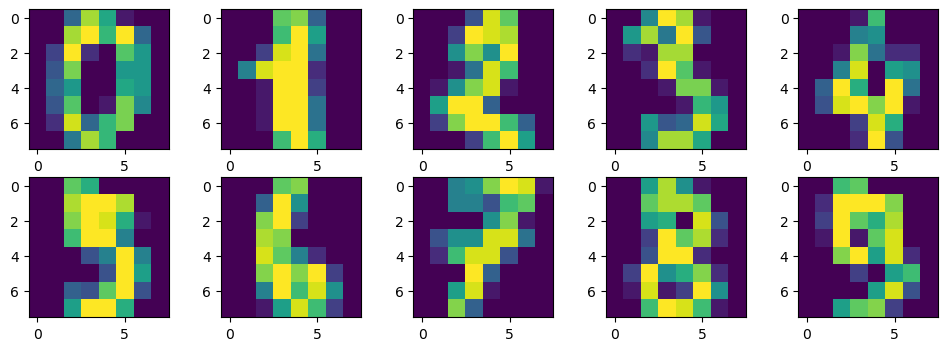

In [20]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [21]:
X.shape

(1797, 64)

In [22]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
y.shape

(1797,)

In [24]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [25]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [26]:
# ф-я активации - сигмоид
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# и ее производная
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [27]:
# формирование входных данных - нормируем по минимуму и максимуму
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных (результатов) - кодирование в виде бинарных признаков
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [28]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

#### Попробуем варьировать количество итераций (epochs) до 500: 

In [36]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваивание случайных весов
np.random.seed(0)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 500

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    #  с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели (будем собирать данные по ошибке)
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества (будем собирать данные по точности)
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

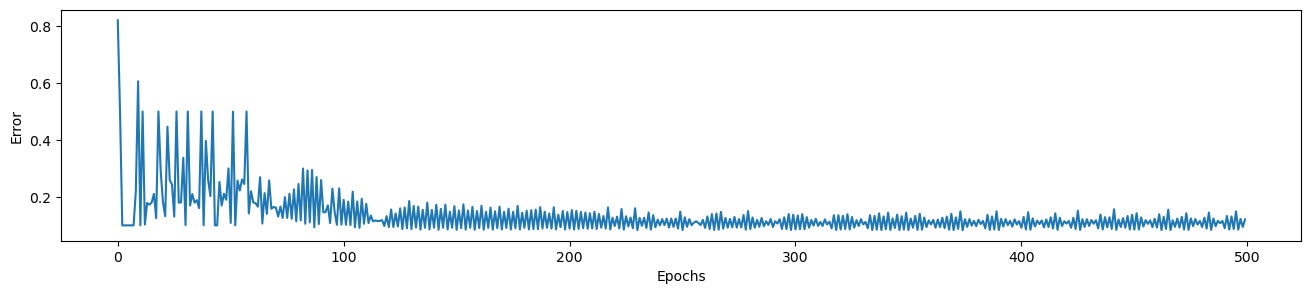

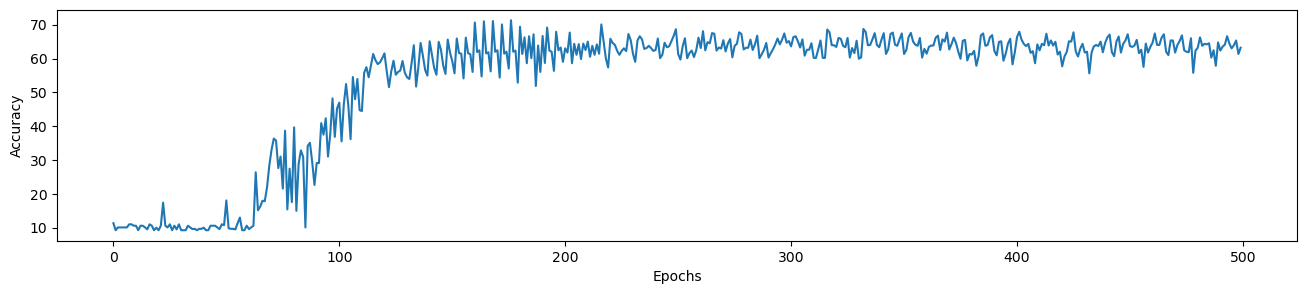

In [37]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 3))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(16, 3))
plt.plot(metrics)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

##### Видно, начиная с epochs = 120 ошибка особо не снижается, колеблясь относительно какого-то значения. Точность стабилизируется, начиная с epochs = 200, далее не возрастая и колеблясь относительно какого-то значения. Далее будем брать epochs = 200

#### Теперь поварьируем количество слоев (neuron_numb) до 100:

In [76]:
def train_nn(X_train, y_train, 
             neuron_numb=5, 
             learning_rate=0.1, 
             num_epochs=100, 
             check_param='', 
             min_value=1, 
             max_value=10, 
             step=1):
    # Обучение нейронной сети

    # определим число нейронов скрытого слоя
    if check_param == 'neuron_numb':
        neuron_numb = np.arange(min_value, max_value+step, step)
    else:
        neuron_numb = neuron_numb

    # скорость обучения (learning rate)
    if check_param == 'learning_rate':
        learning_rate = np.arange(min_value, max_value+step, step)
    else:
        learning_rate = learning_rate

    # количество итераций
    if check_param == 'num_epochs':
        num_epochs = np.arange(min_value, max_value+step, step)
    else:
        num_epochs = num_epochs

    # массив для ошибок, чтобы потом построить график
    results = pd.DataFrame()
    params = []
    vals = []
    errs = []
    mtrs = []
    last_mtrs = []
    last_errs = []
    best_mtrs = []
    
    parameter = ''
    if check_param == 'neuron_numb':
        parameter = neuron_numb
    elif check_param == 'learning_rate':
        parameter = learning_rate
    elif check_param == 'num_epochs':
        parameter = num_epochs
        
    for val in parameter:
        #print(f'train nn with {check_param}={val}...')
        
        if check_param == 'neuron_numb':
            neuron_numb = val
        elif check_param == 'learning_rate':
            learning_rate = val
        elif check_param == 'num_epochs':
            num_epochs = val
        
        params.append(check_param)
        vals.append(val)
    
        errors = []
        metrics = []
        
        # присваивание случайных весов
        np.random.seed(0)
        w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
        w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

        # процесс обучения
        for i in range(num_epochs):

            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            # обратное распространение (back propagation)
            #  с использованием градиентного спуска
            layer2_error = layer2 - y_train  # производная функции потерь
            layer2_grad = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_grad.dot(w1.T)
            layer1_grad = layer1_error * sigmoid_deriv(layer1)

            w1 -= layer1.T.dot(layer2_grad) * learning_rate
            w0 -= layer0.T.dot(layer1_grad) * learning_rate

            # ошибка модели
            error = np.mean(np.abs(layer2_error))
            errors.append(error)

            # метрики качества
            preds = np.argmax(layer2, axis=1)
            labels = np.argmax(y_train, axis=1)
            accuracy = (preds == labels).sum() * 100 / len(labels)
            metrics.append(accuracy)
            
        errs.append(errors)
        mtrs.append(metrics)
        best_mtrs.append(max(metrics))
        last_mtrs.append(metrics[-1])
        last_errs.append(errors[-1])
        #print(f'best_metric={max(metrics)}')
        
    results['param'] = params
    results['val'] = vals
    results['errors'] = errs
    results['last_error'] = last_errs
    results['metrics'] = mtrs
    results['last_metric'] = last_mtrs
    results['best_metric'] = best_mtrs
        
    return results

In [84]:
res_neuron_numb = train_nn(X_train, y_train, 
             neuron_numb=5, 
             learning_rate=0.01, 
             num_epochs=200, 
             check_param='neuron_numb', 
             min_value=1, 
             max_value=100, 
             step=1)

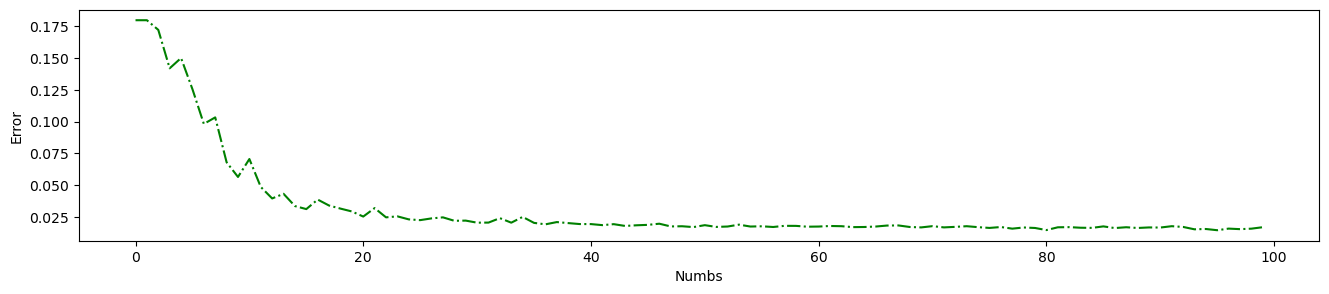

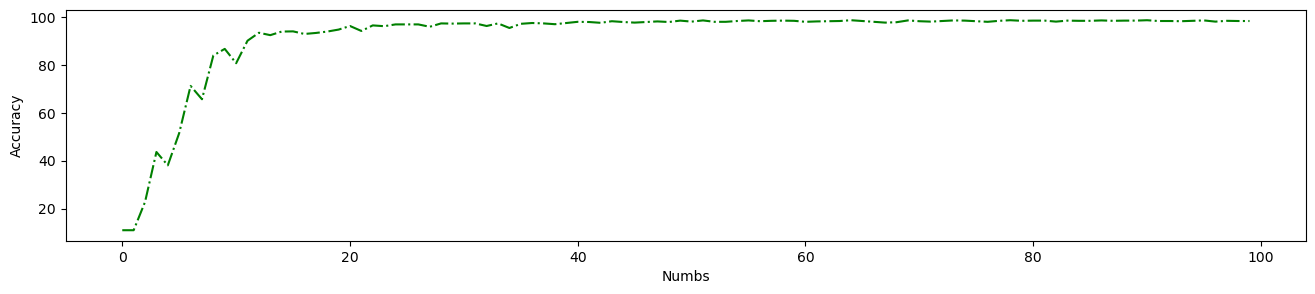

In [98]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от количества скрытых слоев
plt.figure(figsize=(16, 3))
plt.plot(list(res_neuron_numb['last_error']), color='green', linestyle='-.')
plt.xlabel('Numbs')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(16, 3))
plt.plot(list(res_neuron_numb['best_metric']), color='green', linestyle='-.')
plt.xlabel('Numbs')
plt.ylabel('Accuracy')
plt.show()

###### Видно, начиная с neuron_numb = 50 ошибка особо не снижается. Точность стабилизируется, начиная с neuron_numb = 40. Далее будем брать neuron_numb = 50

#### Далее поварьируем скорость обучения (learning rate) до 1 с шагом 0.05:

In [99]:
res_learning_rate = train_nn(X_train, y_train, 
             neuron_numb=50, 
             learning_rate=0.01, 
             num_epochs=200, 
             check_param='learning_rate', 
             min_value=0.01, 
             max_value=1, 
             step=0.005)

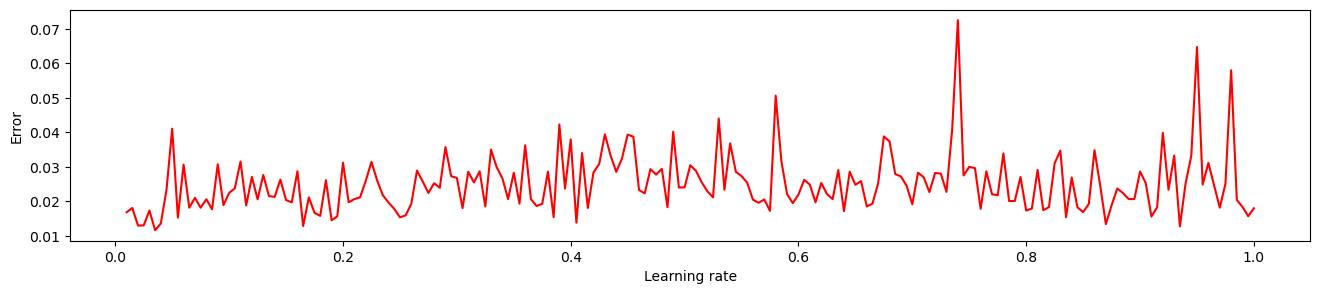

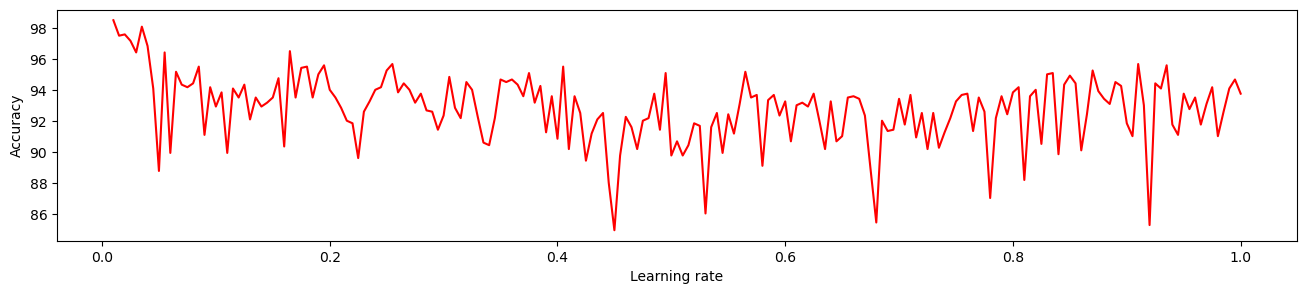

In [113]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от скорости обучения
plt.figure(figsize=(16, 3))
plt.plot(res_learning_rate['val'], list(res_learning_rate['last_error']), color='red', linestyle='-')
plt.xlabel('Learning rate')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(16, 3))
plt.plot(res_learning_rate['val'], list(res_learning_rate['best_metric']), color='red', linestyle='-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.show()

###### Из-за флуктуаций метрик, не видно тренда. Применим скользящее среднее для того, чтобы увидеть тренд

In [104]:
def moving_avg(x, n):
 cumsum = np.cumsum(np.insert(x, 0, 0)) 
 return (cumsum[n:] - cumsum[:-n]) / float(n)

In [110]:
ma_res_lr_error = moving_avg(res_learning_rate['last_error'], 4)
ma_res_lr_metric = moving_avg(res_learning_rate['best_metric'], 4)

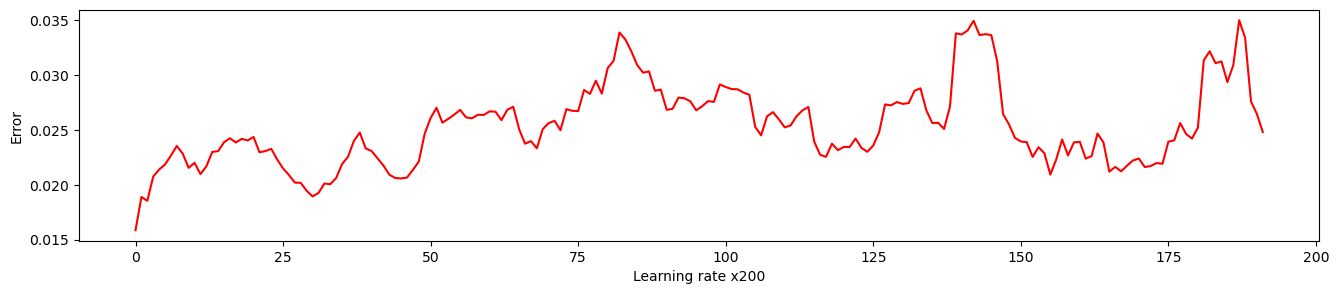

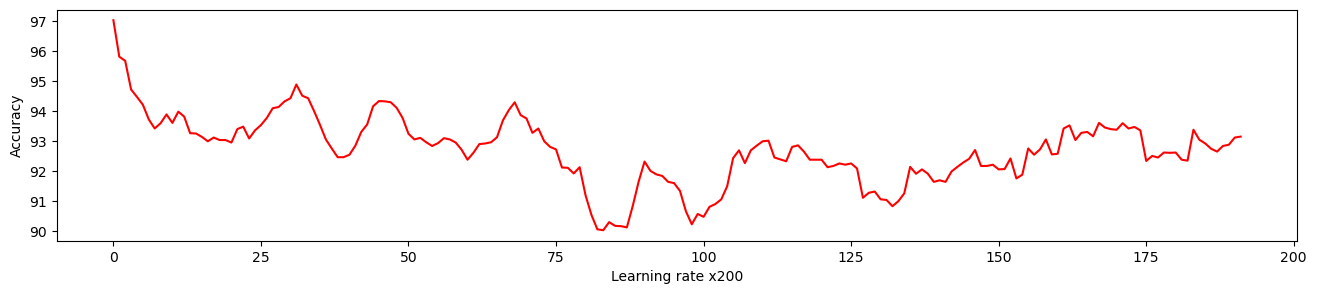

In [116]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от скорости обучения
plt.figure(figsize=(16, 3))
plt.plot(list(ma_res_lr_error), color='red', linestyle='-')
plt.xlabel('Learning rate x200')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(16, 3))
plt.plot(list(ma_res_lr_metric), color='red', linestyle='-')
plt.xlabel('Learning rate x200')
plt.ylabel('Accuracy')
plt.show()

###### Максимальное качество наблюдается при минимальных скоростях обучения 

#### Выводы:
#### 1) при увеличении количества итераций качество возрастает (с опред. значения перестает меняться),
#### 2) при увеличении числа нейронов скрытого слоя качество возрастает (с опред. значения перестает меняться),
#### 3) высокое качество наблюдается при минимальных скоростях обучения (компромисс зависит от вычислительной мощности).